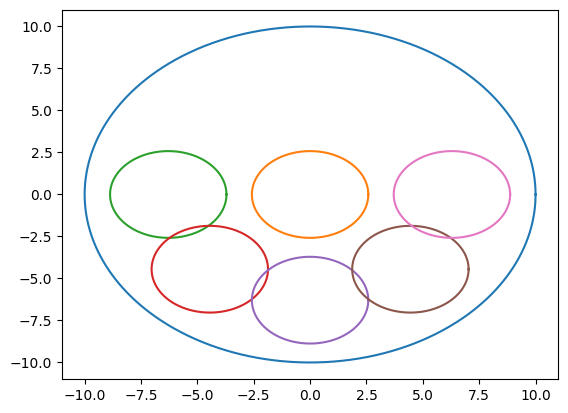

In [2]:
import numpy as np
import matplotlib.pyplot as plt
r = 10
theta = np.linspace(0, 2 * np.pi, 1000)
plt.plot(r * np.cos(theta), r * np.sin(theta))
bundle_area = np.pi * r ** 2
fibers = 15
fiber_area_estimate = bundle_area / fibers
fiber_r = np.sqrt(fiber_area_estimate / np.pi)
n_of_fibers = int(r / fiber_r)
radius_to_draw = np.linspace(0, r - fiber_r, n_of_fibers)
if radius_to_draw[-1] + 2 * fiber_r > r:
    radius_to_draw = radius_to_draw[:-1]
arc_length = np.pi * radius_to_draw
n_fibers_per_ring = (arc_length / fiber_r + 1).astype(int)
# plt.plot(fiber_r * np.cos(theta) - (r - (fiber_r + spacing)) * np.cos(3 * np.pi / 2), fiber_r * np.sin(theta) - (r - (fiber_r + spacing)) * np.sin(3 * np.pi / 2))
for i in range(0, int(len(n_fibers_per_ring) / 2 + 1)):
# for i in range(0, 2):
    thetas = np.linspace(0, np.pi, n_fibers_per_ring[i])
    for t in thetas:
        plt.plot(fiber_r * np.cos(theta) - ((radius_to_draw[i] + fiber_r * i) * np.cos(t)), fiber_r * np.sin(theta) - ((radius_to_draw[i] + fiber_r * i) * np.sin(t)))
plt.show()

2.0008342722308017
0.20008342722308017


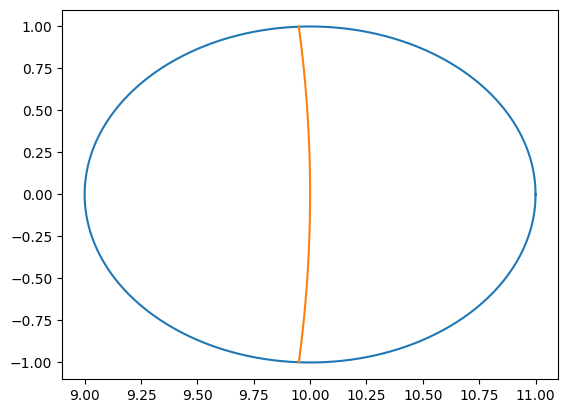

In [3]:
R = 10
r = 1
# plt.plot(R * np.cos(theta), R * np.sin(theta))
t = np.pi
plt.plot(r *  np.cos(theta) - R * np.cos(t), r * np.sin(theta) - R * np.sin(t))
arc_length = 2 * R * np.arccos(1 - r ** 2 / (2 * R ** 2))
print(arc_length)
print(arc_length / R)
t = np.linspace(-arc_length / R / 2, arc_length / R / 2, 100)
plt.plot(R * np.cos(t), R * np.sin(t))

62


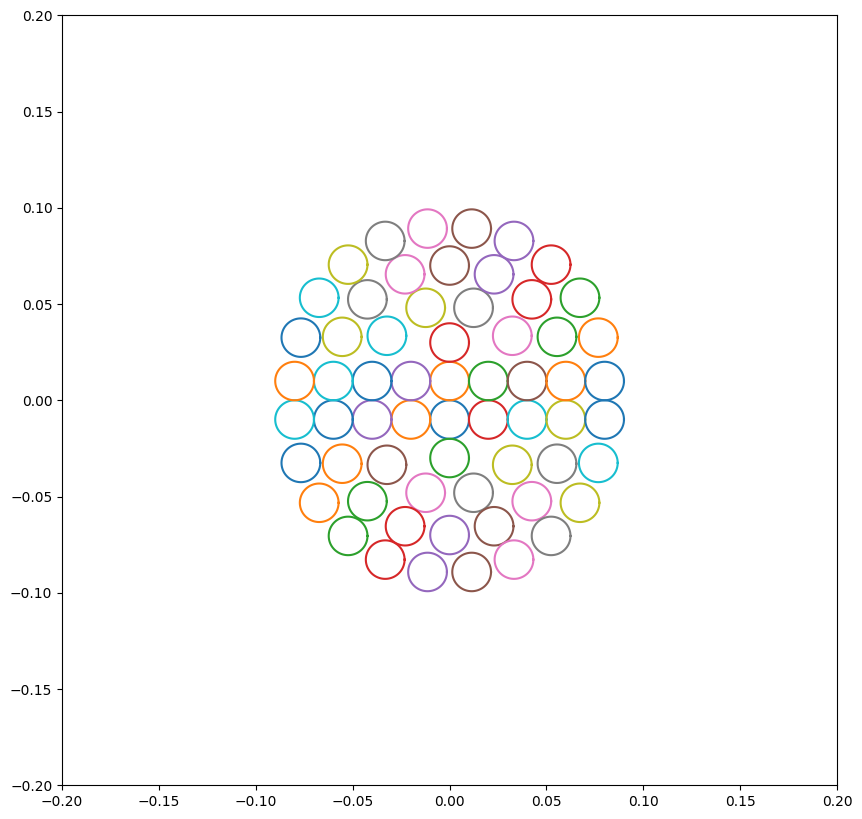

62


In [3]:
R = 1e-1 # approximate outter radius. Sometimes the fiber bundle is under/over filled
window = 1e-1
theta = np.linspace(0, 2 * np.pi, 100)
r = 1e-2
t = 0
half_circle_R = R - r
r_steps = np.r_[r, np.linspace(2 * r, half_circle_R - half_circle_R % (2 * r), int(half_circle_R / (2 * r)))]
fibers = 0
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
ax.set_xlim(-R - window, R + window)
ax.set_ylim(-R - window, R + window)
# ax.plot(R * np.cos(theta), R * np.sin(theta))
for i in range(0, len(r_steps)):
    thetas = np.linspace(0, np.pi, int(np.pi / ((2 * r_steps[i] * np.arccos(1 - r ** 2 / (2 * r_steps[i] ** 2))) / r_steps[i])))
    for t in thetas:
        if i == 0:
            ax.plot(r * np.cos(theta), r * np.sin(theta) - r)
        else:
            ax.plot(r * np.cos(theta) - r_steps[i] * np.cos(t), r * np.sin(theta) - r_steps[i] * np.sin(t) - r)
        fibers += 1
for i in range(0, len(r_steps)):
    thetas = np.linspace(np.pi, 2 * np.pi, int(np.pi / ((2 * r_steps[i] * np.arccos(1 - r ** 2 / (2 * r_steps[i] ** 2))) / r_steps[i])))
    for t in thetas:
        if i == 0:
            ax.plot(r * np.cos(theta), r * np.sin(theta) + r)
        else:
            ax.plot(r * np.cos(theta) - r_steps[i] * np.cos(t), r * np.sin(theta) - r_steps[i] * np.sin(t) + r)
        fibers += 1
# laser = 25
# ax.fill(laser * np.cos(theta), laser * np.sin(theta), zorder = -1, c = "r")
# ax.axline((0, 50), (50, 50))
# ax.axline((50, 50), (50, -50))
# ax.axline((-50, -50), (50, -50))
# ax.axline((-50, -50), (-50, 50))
print(fibers)
plt.show()
print(14+18+12+10+8)

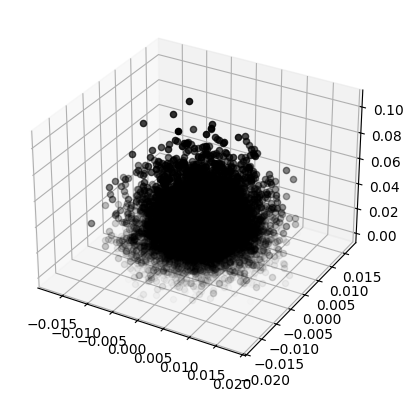

200.0000000000002


In [1]:
import matplotlib.pyplot as plt
import laser
import numpy as np
l = laser.Laser(res = 10000, waist = 1e-2, power = 200)
fig = plt.figure()
ax = plt.axes(projection = "3d")
plt.ioff()
for val in zip(l.x, l.y, l.P):
    ax.scatter(val[0], val[1], val[2], alpha = (val[2] / np.max(l.P)), c = "k")
plt.ion()
plt.show()
print(sum(l.P))

In [ ]:
import fiber
import laser
import matplotlib.pyplot as plt
import numpy as np
import time 
from joblib import Parallel, delayed
t1 = time.time()
bundle = fiber.FiberBundle(1e-1, 1e-3)
t2 = time.time()
print(t2 - t1)
l = laser.Laser(res = 1000000, waist = 1e-2, power = 200)

1.8736259937286377


In [ ]:
t1 = time.time()
print(bundle.sum_power(l))
t2 = time.time()
# print(sum(l.P))
# print(bundle.total_power / sum(l.P))
print(t2 - t1)

In [ ]:
print(bundle.thetas)
print(bundle.ring_radius)
print(bundle.ring_number)
print(bundle.half)
print(bundle.sum_power(l))

In [2]:
import fiber
import laser
import matplotlib.pyplot as plt
import numpy as np
import time 
for i in range(10):
    bundle = fiber.FiberBundle(1e-1, 1e-3)
    l = laser.Laser(res = 1000000, waist = 1e-1, power = 200)
    bundle.sum_power(l)
    print(100 * bundle.total_power / sum(l.P))
print((bundle.fr ** 2 * np.pi * bundle.count) / (bundle.r ** 2 * np.pi) * 100)

7.705903768539429 seconds
48.674310890487405


64.6401481628418


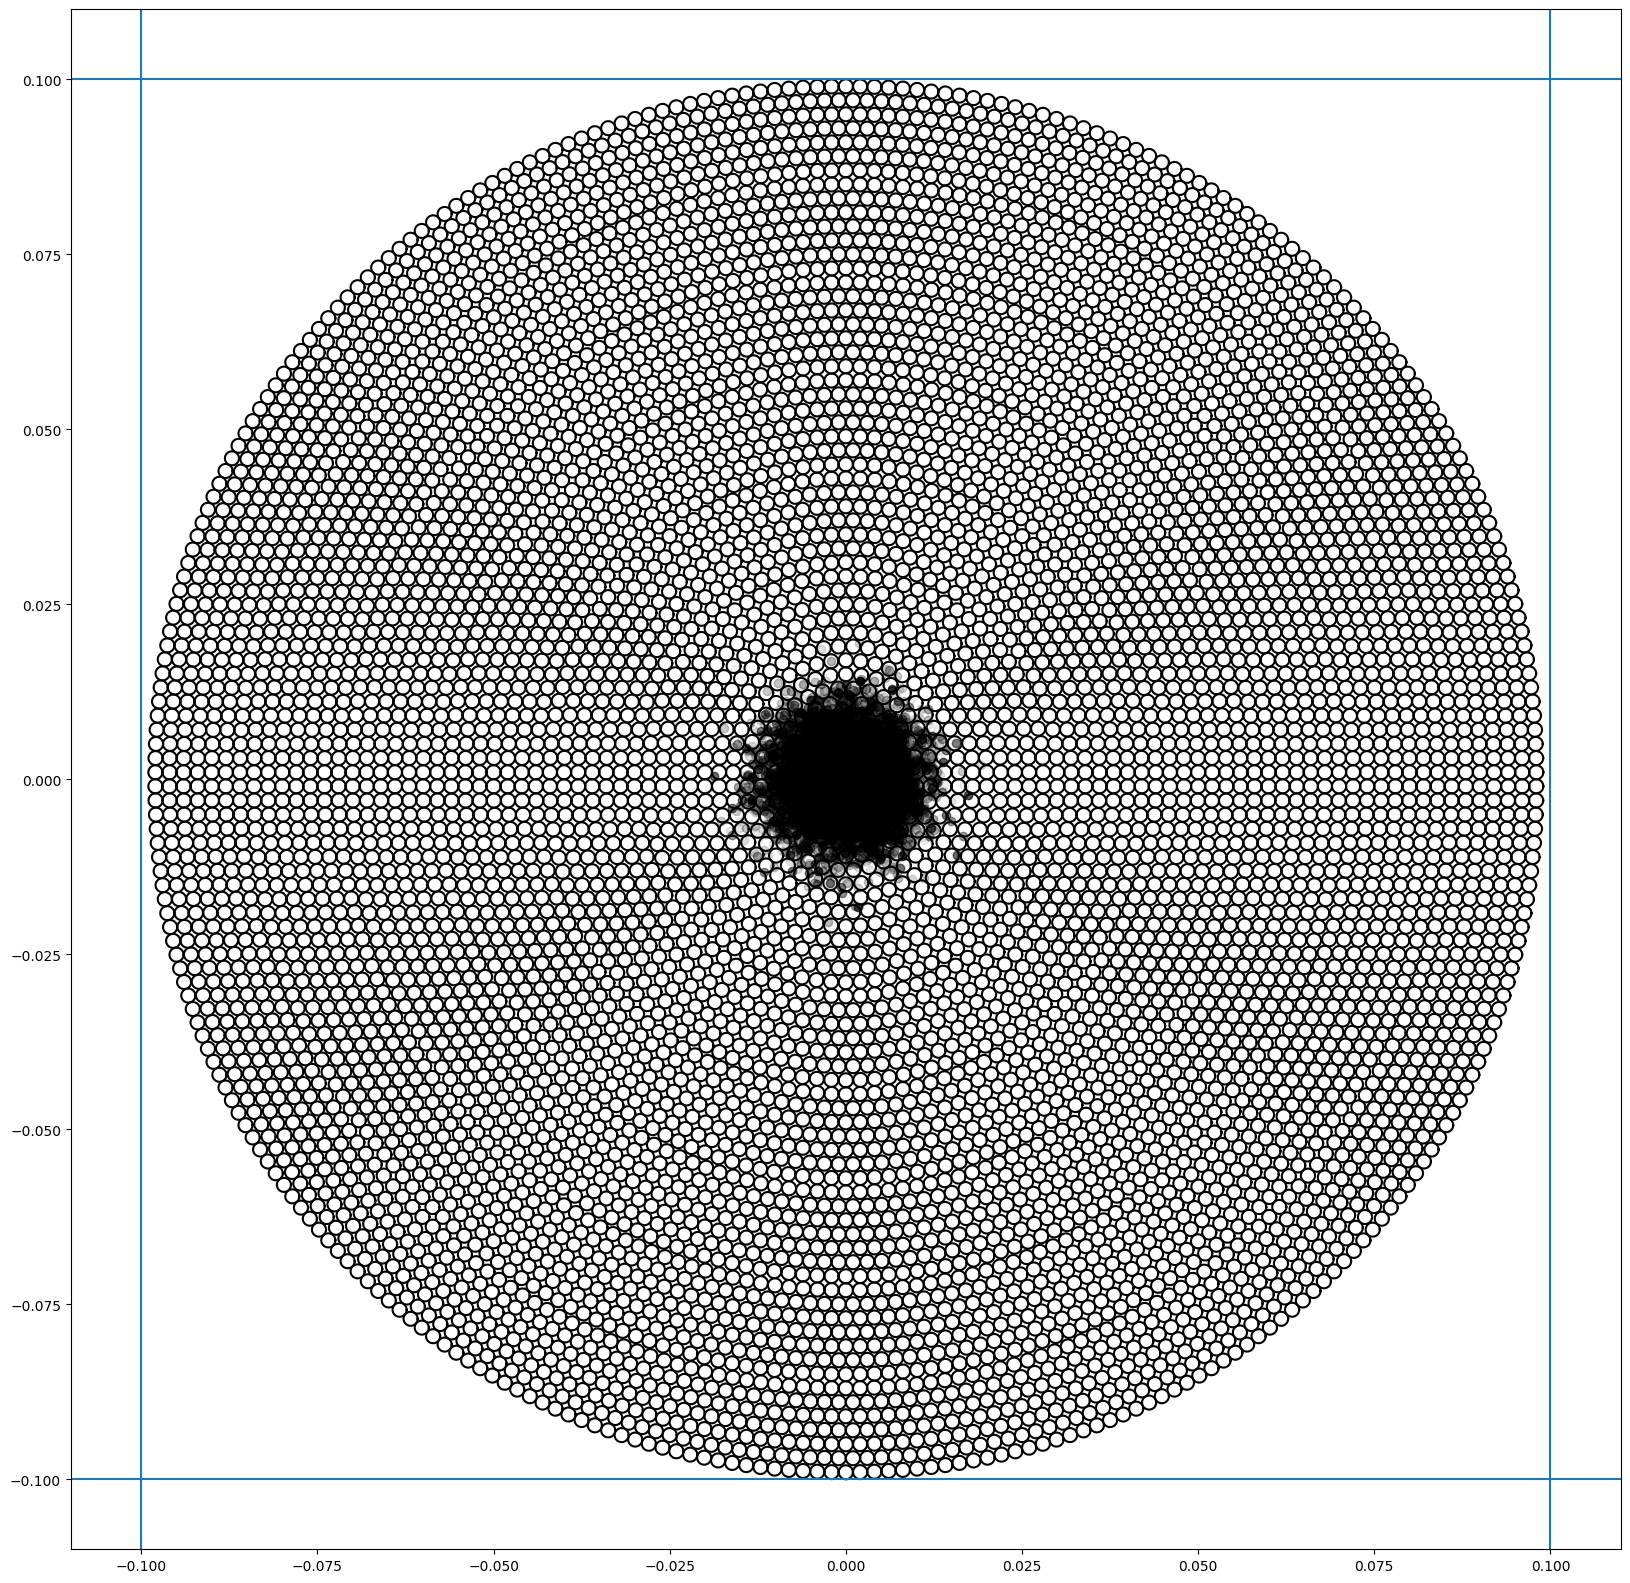

In [3]:
t1 = time.time()
fig, ax = bundle.plot(figsize = (20, 20), scatter_size = 1, c = "k")
plt.ioff()
for val in zip(l.x, l.y, l.P):
    ax.scatter(val[0], val[1], alpha = (val[2] / np.max(l.P)), c = "k")
plt.ion()
t2 = time.time()
print(t2 - t1)
plt.show()